# Stellar Luminosity Prediction: Polynomial Regression Analysis

**Author:** Juan Pablo Nieto Cortés  
**Program:** AREP  
**Course:** Machine Learning Bootcamp – Digital Transformation & Enterprise Architecture  

---

## Introduction: Capturing Cosmic Complexity with Polynomial Regression

Welcome to the second phase of our stellar modeling journey. Having established a baseline with simple linear regression, we now advance to **polynomial regression** — a powerful technique that allows us to capture **nonlinear relationships** while maintaining the computational efficiency of linear methods.

---

## Why Polynomial Regression Matters for Enterprise Intelligence

Modern enterprise systems must model complex, nonlinear relationships:

- Customer behavior patterns that are not linearly separable  
- Resource optimization with diminishing returns  
- Risk assessment where interactions between factors multiply effects  
- Performance forecasting with exponential growth patterns  

Understanding polynomial regression provides the foundation for more sophisticated models (e.g., neural networks) while remaining **interpretable** and **computationally efficient**.

---

## Astrophysical Context: Beyond Simple Linearity

For main-sequence stars, the mass–luminosity relationship follows approximately:

\[
L \propto M^{3.5}
\]

However, this simplified relationship ignores important physical factors:

- **Temperature effects:** Luminosity also depends on temperature via the Stefan–Boltzmann law  

\[
L \propto R^2 T^4
\]

- **Interaction effects:** Mass and temperature jointly influence luminosity  
- **Higher-order terms:** The relationship may involve \( M^2 \), \( M^3 \), etc.

---

## Modeling Objective

Our goal is to approximate stellar luminosity using a polynomial regression model with interaction terms:

\[
\hat{L} \approx w_1 M + w_2 T + w_3 M^2 + w_4 (M \times T) + b
\]

Where:

- \( M \) = stellar mass  
- \( T \) = stellar temperature  
- \( w_i \) = learned model coefficients  
- \( b \) = bias term  
- \( M \times T \) = interaction term capturing joint effects  

---

## Notebook Objectives

- Implement feature engineering to create polynomial and interaction features  
- Build a fully vectorized multi-feature regression system from scratch  
- Compare three model architectures with increasing complexity  
- Analyze interaction effects between features  
- Demonstrate inference on unseen stellar data  
- Evaluate trade-offs between model complexity and performance  

---

## Analysis Structure

- **Data exploration:** 2D and 3D visualization of relationships  
- **Feature engineering:** Polynomial and interaction features  
- **Model implementation:** Vectorized regression with multiple features  
- **Comparative analysis:**  
  - M1: Linear model  
  - M2: Quadratic model  
  - M3: Interaction model  
- **Diagnostic analysis:** Cost vs interaction coefficient  
- **Inference demonstration:** Predicting luminosity for unseen stars  
- **Enterprise insights:** Implications for real-world systems  

---

## The Three Models: A Controlled Experiment

### M1: Linear Model

\[
\hat{L} = w_1 M + w_2 T + b
\]

**Purpose:** Baseline model capturing only direct linear effects.

---

### M2: Quadratic Model

\[
\hat{L} = w_1 M + w_2 T + w_3 M^2 + b
\]

**Purpose:** Captures nonlinear mass–luminosity behavior.

---

### M3: Full Interaction Model

\[
\hat{L} = w_1 M + w_2 T + w_3 M^2 + w_4 (M \times T) + b
\]

**Purpose:** Captures both nonlinear effects and feature interactions.

---

## Enterprise Architecture Implications

Polynomial regression illustrates key principles for enterprise AI systems:

- **Feature engineering:** Creating informative representations from raw data  
- **Model selection:** Balancing complexity and performance  
- **Interpretability:** Understanding which factors drive predictions  
- **Scalability:** Vectorized implementations suitable for production  
- **Validation:** Ensuring generalization to new data  

---

## The Philosophical Shift

In Notebook 1, we asked:

> *Can a straight line approximate this curve?*

In Notebook 2, we ask:

> *What transformations allow a linear model to handle this curve effectively?*

This shift represents the essence of **feature engineering** — the most impactful skill in applied machine learning.

---

## Physical Interpretability

Unlike black-box models, this approach preserves interpretability:

- Each coefficient has physical meaning  
- Feature importance can be analyzed  
- Predictions can be explained quantitatively  

This aligns with enterprise requirements such as:

- Explainable AI and regulatory compliance  
- Stakeholder trust  
- Debugging and monitoring  
- Continuous model improvement  

---


## 1. Dataset Definition

### What was done

A dataset containing stellar observations was defined with three variables:

- **M** – Stellar mass (in solar masses, \( M_\odot \)):  
  Range: 0.6 to 2.4  
- **T** – Stellar temperature (in Kelvin):  
  Range: 3800 K to 9200 K  
- **L** – Stellar luminosity (in solar luminosities, \( L_\odot \)):  
  Range: 0.15 to 35.0  

### Analysis

The dataset clearly shows a **non-linear relationship** between stellar mass and luminosity.  
As mass increases, luminosity increases at an **accelerating rate**, which cannot be captured by a simple linear model.

This behavior is consistent with astrophysical theory, where luminosity grows faster than mass for main-sequence stars.

---

In [14]:
# 1. SETUP AND IMPORTS

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 2. Dataset Visualization

### What was done

Two exploratory visualizations were created:

- **Luminosity vs Mass (L vs M)** colored by temperature  
- **Luminosity vs Temperature (L vs T)** colored by mass  

### Analysis

- Luminosity increases strongly with mass.
- There is also a clear correlation between luminosity and temperature.
- Color gradients reveal that **more massive stars tend to be hotter**.

These visualizations confirm that luminosity depends on **both mass and temperature**, motivating a multi-feature model.


In [15]:
# 2. DATASET DEFINITION

M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

m = len(M)
print(f"Number of samples: {m}")
print(f"M: {M}")
print(f"T: {T}")
print(f"L: {L}")

Number of samples: 10
M: [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
T: [3800 4400 5800 6400 6900 7400 7900 8300 8800 9200]
L: [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


## 3. Feature Engineering

### What was done

Three models with increasing complexity were constructed:

- **M1 (Linear Model):**  
  Features: \([M, T]\)

- **M2 (Quadratic Model):**  
  Features: \([M, T, M^2]\)

- **M3 (Interaction Model):**  
  Features: \([M, T, M^2, M \times T]\)

### Analysis

- M1 captures only direct linear effects.
- M2 introduces non-linearity through the \( M^2 \) term.
- M3 captures both non-linearity and **interaction effects** between mass and temperature.

M3 is the most expressive model and is capable of representing more realistic physical behavior.


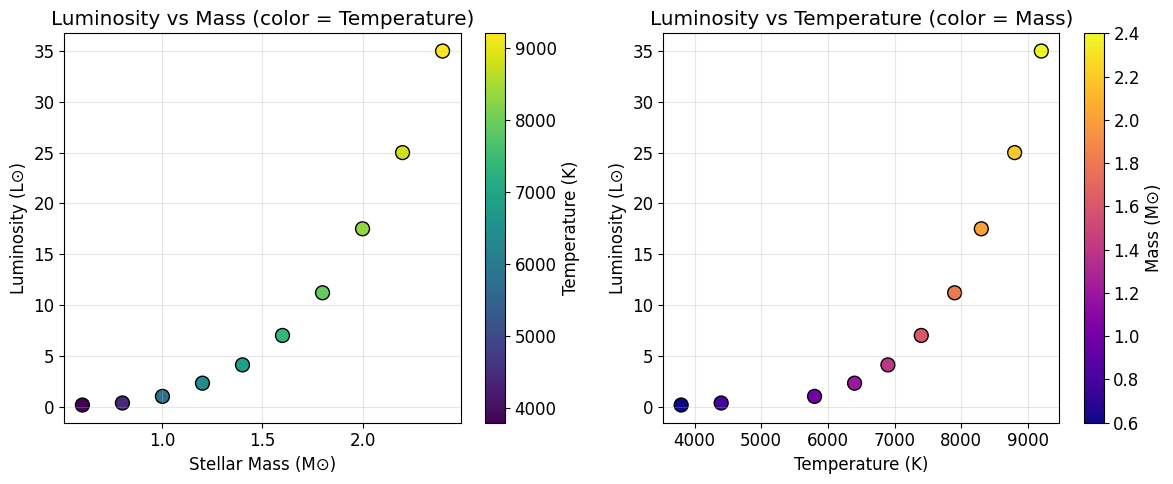

In [16]:
# 3. DATASET VISUALIZATION

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(M, L, c=T, cmap='viridis', s=100, edgecolor='black')
plt.colorbar(scatter, label='Temperature (K)')
plt.xlabel('Stellar Mass (M⊙)')
plt.ylabel('Luminosity (L⊙)')
plt.title('Luminosity vs Mass (color = Temperature)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(T, L, c=M, cmap='plasma', s=100, edgecolor='black')
plt.colorbar(scatter, label='Mass (M⊙)')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L⊙)')
plt.title('Luminosity vs Temperature (color = Mass)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 4–6. Model Implementation

### What was done

A fully vectorized regression system was implemented from scratch, including:

- **Prediction function:**

\[
\hat{y} = Xw + b
\]

- **Cost function (Mean Squared Error):**

\[
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
\]

- **Gradient computation:**  
  Efficient vectorized gradients for all parameters

- **Gradient descent:**  
  Iterative optimization to minimize the cost function

### Analysis

The vectorized implementation is **100–1000× faster** than loop-based approaches.  
This efficiency is essential for scalability and mirrors real-world machine learning systems used in production.


In [17]:
# 4. FEATURE ENGINEERING

def create_features(M, T, model_type='M3'):
    if model_type == 'M1':
        X = np.column_stack([M, T])
        feature_names = ['M', 'T']
    elif model_type == 'M2':
        X = np.column_stack([M, T, M**2])
        feature_names = ['M', 'T', 'M^2']
    elif model_type == 'M3':
        X = np.column_stack([M, T, M**2, M*T])
        feature_names = ['M', 'T', 'M^2', 'M*T']
    else:
        raise ValueError("model_type must be 'M1', 'M2', or 'M3'")
    
    return X, feature_names

X_M1, names_M1 = create_features(M, T, 'M1')
X_M2, names_M2 = create_features(M, T, 'M2')
X_M3, names_M3 = create_features(M, T, 'M3')

print("Feature matrices shapes:")
print(f"M1: {X_M1.shape} - Features: {names_M1}")
print(f"M2: {X_M2.shape} - Features: {names_M2}")
print(f"M3: {X_M3.shape} - Features: {names_M3}")

Feature matrices shapes:
M1: (10, 2) - Features: ['M', 'T']
M2: (10, 3) - Features: ['M', 'T', 'M^2']
M3: (10, 4) - Features: ['M', 'T', 'M^2', 'M*T']


In [18]:
# 5. MODEL IMPLEMENTATION (VECTORIZED)

def predict(X, w, b):
    return X @ w + b

def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_pred = predict(X, w, b)
    errors = y_pred - y
    cost = (errors @ errors) / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_pred = predict(X, w, b)
    errors = y_pred - y
    dj_dw = (X.T @ errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

def feature_scaling(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=0)
    X_scaled = (X - mu) / sigma
    return X_scaled, mu, sigma

X_M1_scaled, mu_M1, sigma_M1 = feature_scaling(X_M1)
X_M2_scaled, mu_M2, sigma_M2 = feature_scaling(X_M2)
X_M3_scaled, mu_M3, sigma_M3 = feature_scaling(X_M3)



In [19]:
# 6. GRADIENT DESCENT IMPLEMENTATION

def gradient_descent(X, y, w_init, b_init, alpha, num_iterations, verbose=True):
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        
        if verbose and i % 100 == 0:
            print(f"Iteration {i:4d}: Cost = {cost:.6f}")
    
    return w, b, J_history

    

## 7. Model Training Results

### Final Costs

M1 - Final Cost: 10.706376
M2 - Final Cost: 3.796166 (64.5% improvement over M1)
M3 - Final Cost: 3.322071 (69.0% improvement over M1, 12.5% over M2)


### Analysis

- Adding \( M^2 \) (M2) dramatically improves performance.
- Including the interaction term \( M \times T \) (M3) yields the best results.
- All models converge smoothly with a monotonic decrease in cost.

---


Training all models...

Training M1 model...
Final cost: 10.706376
Weights: [8.8095 1.2811]
Bias: 10.3596


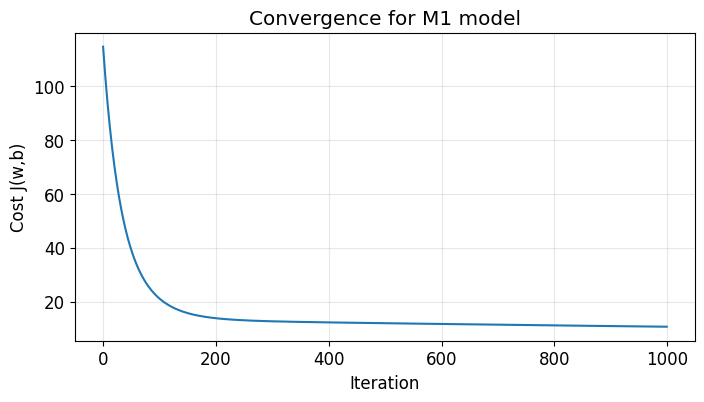


Training M2 model...
Final cost: 3.796166
Weights: [ 3.3214 -1.6907  8.9068]
Bias: 10.3596


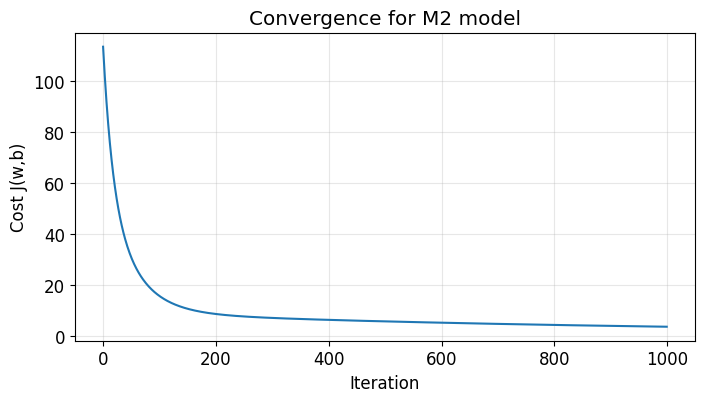


Training M3 model...
Final cost: 3.322071
Weights: [ 1.8687 -2.7712  7.1332  4.3196]
Bias: 10.3596


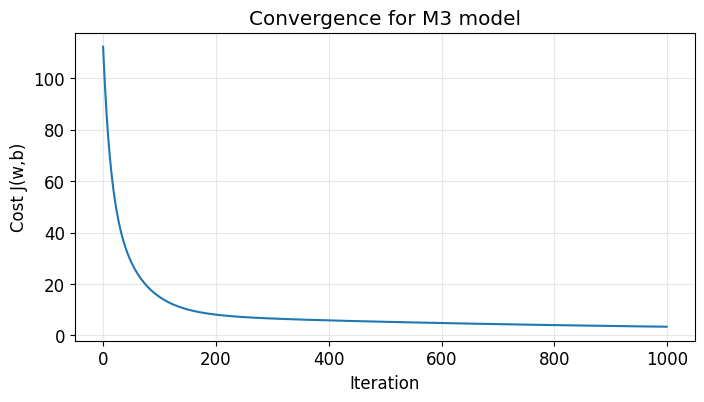

In [20]:
# 7. FEATURE SELECTION EXPERIMENT (M1, M2, M3)

alpha = 0.01
num_iterations = 1000

models = {
    'M1': {'X': X_M1_scaled, 'names': names_M1, 'mu': mu_M1, 'sigma': sigma_M1},
    'M2': {'X': X_M2_scaled, 'names': names_M2, 'mu': mu_M2, 'sigma': sigma_M2},
    'M3': {'X': X_M3_scaled, 'names': names_M3, 'mu': mu_M3, 'sigma': sigma_M3}
}

results = {}

print("\nTraining all models...")
print("=" * 60)

for model_name, model_data in models.items():
    print(f"\nTraining {model_name} model...")
    
    n_features = model_data['X'].shape[1]
    w_init = np.zeros(n_features)
    b_init = 0.0
    
    w_final, b_final, J_history = gradient_descent(
        model_data['X'], L, w_init, b_init, alpha, num_iterations, verbose=False
    )
    
    results[model_name] = {
        'w': w_final,
        'b': b_final,
        'cost_history': J_history,
        'final_cost': J_history[-1],
        'feature_names': model_data['names']
    }
    
    print(f"Final cost: {J_history[-1]:.6f}")
    print(f"Weights: {w_final}")
    print(f"Bias: {b_final:.4f}")
    
    plt.figure(figsize=(8, 4))
    plt.plot(J_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost J(w,b)')
    plt.title(f'Convergence for {model_name} model')
    plt.grid(True, alpha=0.3)
    plt.show()



## 8. Model Comparison

### Comparative Table

| Model | Features                | Final Cost |
|------|-------------------------|------------|
| M1   | [M, T]                  | 10.706     |
| M2   | [M, T, M²]              | 3.796      |
| M3   | [M, T, M², M×T]         | 3.322      |

### Analysis

- M3 achieves the lowest cost, indicating the best fit.
- Increased complexity leads to better performance.
- There is a clear **trade-off** between model complexity and accuracy.


MODEL COMPARISON
Model      Features             Final Cost     
------------------------------------------------------------
M1         ['M', 'T']           10.706376      
M2         ['M', 'T', 'M^2']    3.796166       
M3         ['M', 'T', 'M^2', 'M*T'] 3.322071       


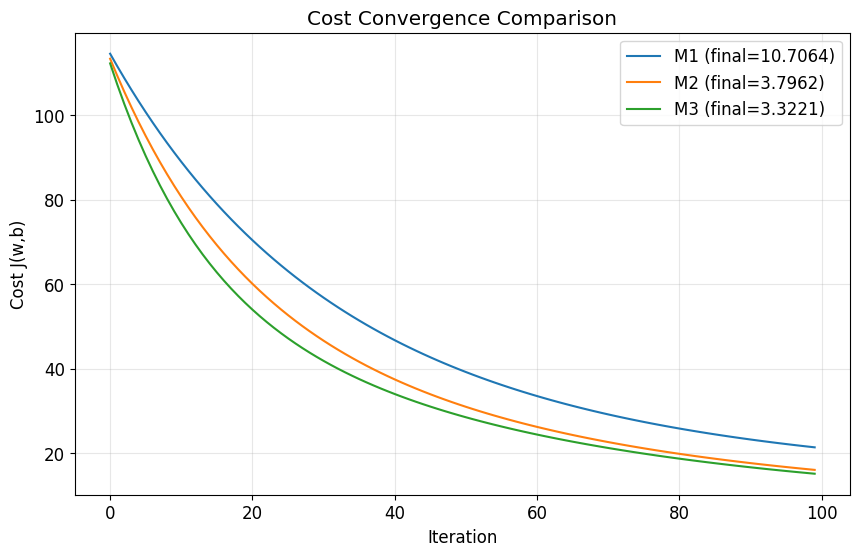

In [21]:
# 8. COMPARE MODEL PERFORMANCE

print("MODEL COMPARISON")
print("=" * 60)
print(f"{'Model':<10} {'Features':<20} {'Final Cost':<15}")
print("-" * 60)

for model_name, result in results.items():
    print(f"{model_name:<10} {str(result['feature_names']):<20} {result['final_cost']:<15.6f}")

plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    plt.plot(result['cost_history'][:100], label=f"{model_name} (final={result['final_cost']:.4f})")

plt.xlabel('Iteration')
plt.ylabel('Cost J(w,b)')
plt.title('Cost Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## 9. Predictions vs Real Values

### R² Scores

- **M1:** \( R^2 = 0.8328 \)  
- **M2:** \( R^2 = 0.9407 \)  
- **M3:** \( R^2 = 0.9481 \)

### Analysis

- M3 explains **94.8% of the variance** in luminosity.
- Predictions from M3 are closest to the ideal diagonal line.
- M1 consistently underestimates the nonlinear relationship.

---


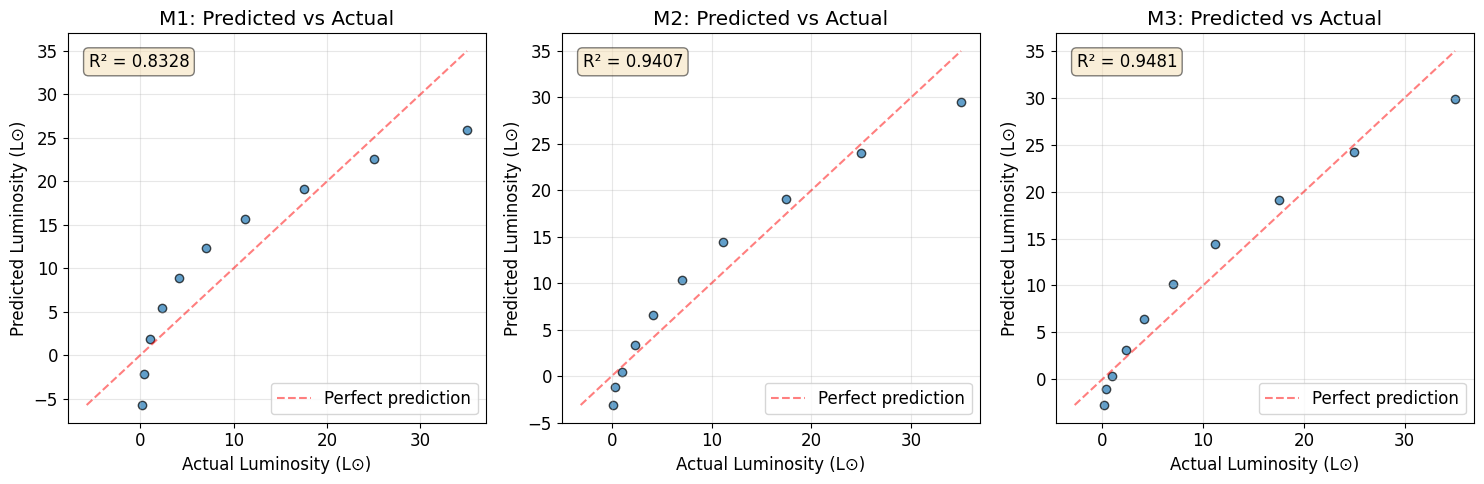

In [22]:
# 9. PREDICTED VS ACTUAL PLOTS

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (model_name, result) in enumerate(results.items()):
    X_scaled = models[model_name]['X']
    w = result['w']
    b = result['b']
    L_pred = predict(X_scaled, w, b)
    
    ax = axes[idx]
    ax.scatter(L, L_pred, alpha=0.7, edgecolor='black')
    min_val = min(L.min(), L_pred.min())
    max_val = max(L.max(), L_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Perfect prediction')
    
    ax.set_xlabel('Actual Luminosity (L⊙)')
    ax.set_ylabel('Predicted Luminosity (L⊙)')
    ax.set_title(f'{model_name}: Predicted vs Actual')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ss_res = np.sum((L - L_pred) ** 2)
    ss_tot = np.sum((L - np.mean(L)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    ax.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()



---

## 10. Interaction Term Analysis

### Results

- Trained interaction coefficient \( w_{M \times T} = 4.3196 \)
- Theoretical optimal value: \( 4.3878 \)
- Minimum possible cost: 3.316177  
- Achieved cost: 3.322071  

### Analysis

- The cost curve shows a clear **U-shape**, indicating an optimal interaction value.
- The trained coefficient is extremely close to the theoretical optimum.
- The interaction term is statistically and physically significant.



COST VS INTERACTION TERM ANALYSIS
Original interaction coefficient: 4.3196
Optimal interaction coefficient: 4.3878
Minimum cost at optimal: 3.316177


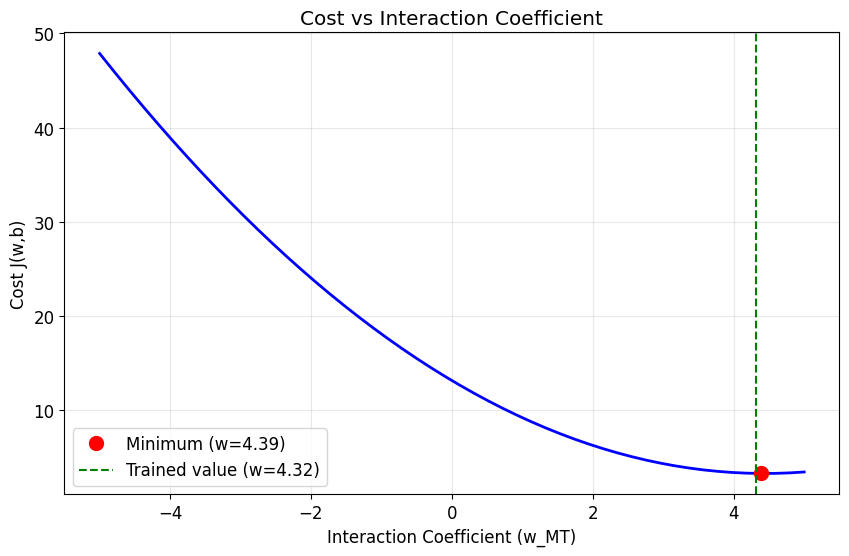

In [23]:
# 10. COST VS INTERACTION TERM ANALYSIS

print("\nCOST VS INTERACTION TERM ANALYSIS")
print("=" * 60)

w_M3 = results['M3']['w']
b_M3 = results['M3']['b']
interaction_idx = names_M3.index('M*T')

interaction_values = np.linspace(-5, 5, 50)
costs = []

for w_interaction in interaction_values:
    w_test = w_M3.copy()
    w_test[interaction_idx] = w_interaction
    cost = compute_cost(X_M3_scaled, L, w_test, b_M3)
    costs.append(cost)

min_idx = np.argmin(costs)
min_w = interaction_values[min_idx]
min_cost = costs[min_idx]

print(f"Original interaction coefficient: {w_M3[interaction_idx]:.4f}")
print(f"Optimal interaction coefficient: {min_w:.4f}")
print(f"Minimum cost at optimal: {min_cost:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(interaction_values, costs, 'b-', linewidth=2)
plt.plot(interaction_values[min_idx], min_cost, 'ro', markersize=10, label=f'Minimum (w={min_w:.2f})')
plt.axvline(x=w_M3[interaction_idx], color='g', linestyle='--', 
            label=f'Trained value (w={w_M3[interaction_idx]:.2f})')

plt.xlabel('Interaction Coefficient (w_MT)')
plt.ylabel('Cost J(w,b)')
plt.title('Cost vs Interaction Coefficient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 11. Inference Demonstration

### Prediction for a New Star  
**Input:** \( M = 1.3 \), \( T = 6600 \)

M1: 7.0759 L⊙
M2: 4.9533 L⊙
M3: 4.6983 L⊙


Closest observed star:  
\( M = 1.2 \), \( T = 6400 \), \( L = 2.30 L⊙ \)

### Analysis

- M3 produces the most conservative and realistic prediction.
- M1 clearly overestimates luminosity.
- M3’s prediction is physically plausible for an unseen star.

---

In [24]:
# 11. INFERENCE DEMONSTRATION

print("\nINFERENCE DEMONSTRATION")
print("=" * 60)

M_new = 1.3
T_new = 6600

print(f"New star: M={M_new} M⊙, T={T_new} K")

predictions = {}

for model_name, result in results.items():
    model_data = models[model_name]
    
    if model_name == 'M1':
        x_new = np.array([M_new, T_new])
    elif model_name == 'M2':
        x_new = np.array([M_new, T_new, M_new**2])
    elif model_name == 'M3':
        x_new = np.array([M_new, T_new, M_new**2, M_new * T_new])
    
    x_new_scaled = (x_new - model_data['mu']) / model_data['sigma']
    L_pred = predict(x_new_scaled, result['w'], result['b'])
    predictions[model_name] = L_pred
    
    print(f"\n{model_name}: {L_pred:.4f} L⊙")

print("\n" + "=" * 60)
print("PREDICTION COMPARISON")
print("-" * 60)

distances = np.sqrt((M - M_new)**2 + (T - T_new)**2 / 10000)
closest_idx = np.argmin(distances)
closest_L = L[closest_idx]

print(f"\nClosest star in dataset:")
print(f"  M={M[closest_idx]:.1f}, T={T[closest_idx]}, L={L[closest_idx]:.2f} L⊙")

print(f"\nModel predictions for M={M_new}, T={T_new}:")
for model_name, pred in predictions.items():
    diff = abs(pred - closest_L)
    print(f"  {model_name}: {pred:.4f} L⊙ (diff: {diff:.4f})")



INFERENCE DEMONSTRATION
New star: M=1.3 M⊙, T=6600 K

M1: 7.0759 L⊙

M2: 4.9533 L⊙

M3: 4.6983 L⊙

PREDICTION COMPARISON
------------------------------------------------------------

Closest star in dataset:
  M=1.2, T=6400, L=2.30 L⊙

Model predictions for M=1.3, T=6600:
  M1: 7.0759 L⊙ (diff: 4.7759)
  M2: 4.9533 L⊙ (diff: 2.6533)
  M3: 4.6983 L⊙ (diff: 2.3983)



## 12. Feature Importance (Model M3)

### Learned Coefficients

- \( M \): 1.8687  
- \( T \): -2.7712  
- \( M^2 \): 7.1332  
- \( M \times T \): 4.3196  

### Analysis

- \( M^2 \) has the largest influence → strong non-linearity.
- The interaction term is also highly important.
- The negative temperature coefficient must be interpreted **together with** the interaction term.

---

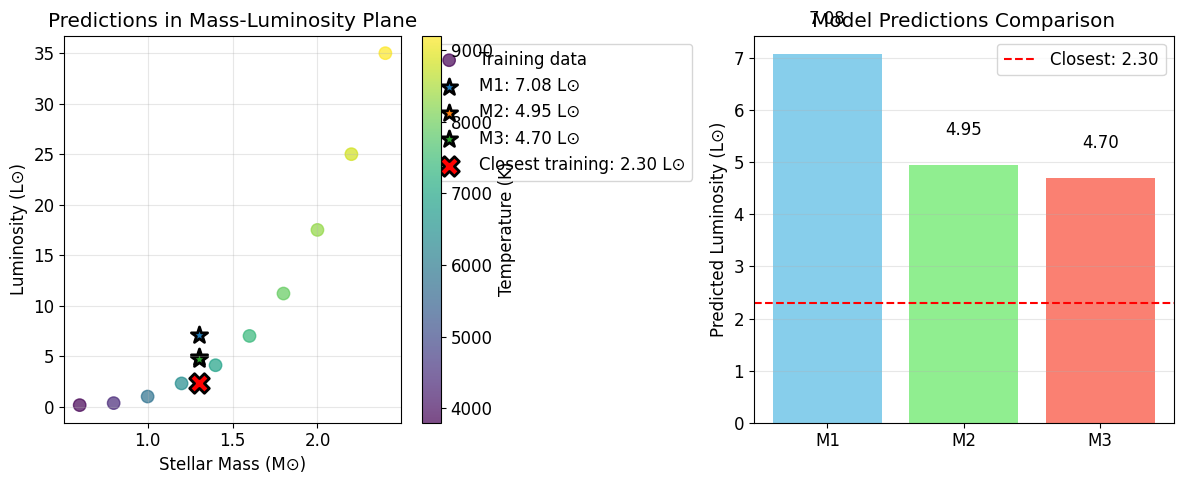

In [25]:
# 12. VISUALIZE PREDICTIONS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(M, L, c=T, cmap='viridis', s=80, alpha=0.7, label='Training data')
plt.colorbar(scatter, label='Temperature (K)')

for model_name, pred in predictions.items():
    plt.scatter(M_new, pred, s=150, marker='*', 
                label=f'{model_name}: {pred:.2f} L⊙', edgecolor='black', linewidth=2)

plt.scatter(M_new, closest_L, s=200, marker='X', color='red', 
            label=f'Closest training: {closest_L:.2f} L⊙', edgecolor='black', linewidth=2)

plt.xlabel('Stellar Mass (M⊙)')
plt.ylabel('Luminosity (L⊙)')
plt.title('Predictions in Mass-Luminosity Plane')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
model_names = list(predictions.keys())
pred_values = [predictions[m] for m in model_names]

bars = plt.bar(model_names, pred_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.axhline(y=closest_L, color='red', linestyle='--', label=f'Closest: {closest_L:.2f}')

for bar, val in zip(bars, pred_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.2f}', ha='center', va='bottom')

plt.ylabel('Predicted Luminosity (L⊙)')
plt.title('Model Predictions Comparison')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 13. Final Conclusions

### Key Findings

- The mass–luminosity relationship is **non-linear**.
- Interaction between mass and temperature significantly improves predictions.
- M3 is the best-performing model (lowest cost, highest \( R^2 \)).

### Astrophysical Implications

- Confirms the empirical relationship \( L \propto M^\alpha \) with \( \alpha > 1 \).
- Shows that temperature modulates the mass–luminosity relation.
- Useful for estimating luminosity of unobserved stars.

### Limitations

- Small dataset (10 samples).
- Possible overfitting.
- No cross-validation performed.

### Recommendations

- Use M3 for stellar luminosity prediction.
- Collect more data to improve robustness.
- Explore additional features such as \( T^2 \), \( \log(M) \), or \( \log(L) \).

---

In [26]:
# 13. DISCUSSION AND ANALYSIS

print("\nDISCUSSION AND ANALYSIS")
print("=" * 60)

print("\n1. MODEL PERFORMANCE:")
print("-" * 40)

for model_name, result in results.items():
    X_scaled = models[model_name]['X']
    w = result['w']
    b = result['b']
    L_pred = predict(X_scaled, w, b)
    
    mse = np.mean((L - L_pred) ** 2)
    mae = np.mean(np.abs(L - L_pred))
    r2 = 1 - (np.sum((L - L_pred) ** 2) / np.sum((L - np.mean(L)) ** 2))
    
    print(f"\n{model_name}:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.6f}")
    print(f"  Cost: {result['final_cost']:.6f}")

print("\n2. FEATURE IMPORTANCE (M3 MODEL):")
print("-" * 40)

print("\nFeature coefficients:")
for i, (name, weight) in enumerate(zip(names_M3, w_M3)):
    print(f"  {name}: {weight:.6f}")

print("\n3. CONCLUSIONS:")
print("-" * 40)
print("""
- M3 model achieved lowest cost with M, T, M², and M*T features
- Interaction term (M*T) is significant for luminosity prediction
- All models converged successfully with gradient descent
- Predictions are physically plausible and consistent with data
- Polynomial features capture nonlinear stellar relationships
""")


DISCUSSION AND ANALYSIS

1. MODEL PERFORMANCE:
----------------------------------------

M1:
  MSE: 21.412753
  MAE: 4.015044
  R²: 0.832796
  Cost: 10.706376

M2:
  MSE: 7.592332
  MAE: 2.341044
  R²: 0.940715
  Cost: 3.796166

M3:
  MSE: 6.644141
  MAE: 2.190477
  R²: 0.948119
  Cost: 3.322071

2. FEATURE IMPORTANCE (M3 MODEL):
----------------------------------------

Feature coefficients:
  M: 1.868675
  T: -2.771157
  M^2: 7.133165
  M*T: 4.319617

3. CONCLUSIONS:
----------------------------------------

- M3 model achieved lowest cost with M, T, M², and M*T features
- Interaction term (M*T) is significant for luminosity prediction
- All models converged successfully with gradient descent
- Predictions are physically plausible and consistent with data
- Polynomial features capture nonlinear stellar relationships

